In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#### Data source : https://www.kaggle.com/datasets/jboysen/global-food-pricesS

In [2]:
df=pd.read_csv('wfp_market_food_prices.csv',encoding='ISO-8859-1')
df_before=df.shape
df.tail()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP
743913,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,3,2017,93.7,WFP


In [3]:
#to change the column names
df.rename(columns={ 'adm0_id':'country_id',
                    'adm0_name':'country_name',
                    'adm1_id':'locality_id',
                    'adm1_name':'locality_name',
                    'mkt_id':'market_id',
                    'mkt_name':'market_name',
                    'cm_id':'commdity_id',
                    'cm_name':'commodity_name',
                    'cur_id':'currency_id',
                    'cur_name':'currency_name',
                    'pt_id':'market_type_id',
                    'pt_name':'market_type',
                    'um_id':'measure_id',
                    'um_name':'measure_name',
                    'mp_month':'month',
                    'mp_year':'year',
                    'mp_price':'price_paid',
                    'mp_commodity_source':'source_name'
                    },inplace=True)

In [4]:
df.isnull().sum()

country_id                0
country_name              0
locality_id               0
locality_name         13949
market_id                 0
market_name               0
commdity_id               0
commodity_name            0
currency_id               0
currency_name             0
market_type_id            0
market_type               0
measure_id                0
measure_name              0
month                     0
year                      0
price_paid                0
mp_commoditysource        0
dtype: int64

#### We can see from above that locality_id is a column with the most null values/incomplete but it is only about 1% of the data and hence we decided not to drop the colunm as we could use locality name in our data set to study it. So we decided to drop those rows instead as we would still have a big data pool.

In [5]:
df.dropna(axis=1,inplace=True)

In [6]:
df1=df

In [7]:
# checking for duplicates
duplicates = df1[df1.duplicated()]
duplicates.count()

country_id            0
country_name          0
locality_id           0
market_id             0
market_name           0
commdity_id           0
commodity_name        0
currency_id           0
currency_name         0
market_type_id        0
market_type           0
measure_id            0
measure_name          0
month                 0
year                  0
price_paid            0
mp_commoditysource    0
dtype: int64

#### Since there are no duplicates we can drop the df1 and work with the original data frame.

In [8]:
del df1

In [9]:
df.describe()

,country_id,locality_id,market_id,commdity_id,currency_id,market_type_id,measure_id,month,year,price_paid
count,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,7.439140e+05
mean,929.754832,17779.426232,885.962341,161.130914,57.325319,14.930508,10.562171,6.379772,2012.516549,4.196333e+03
std,6595.353806,81345.242217,540.492854,117.826297,23.140366,0.277872,13.160485,3.434972,3.669519,5.549296e+04
min,1.000000,0.000000,80.000000,50.000000,22.000000,14.000000,5.000000,1.000000,1992.000000,0.000000e+00
25%,115.000000,1510.000000,377.000000,67.000000,30.000000,15.000000,5.000000,3.000000,2011.000000,3.000000e+01
50%,170.000000,2207.000000,912.000000,110.000000,63.000000,15.000000,5.000000,6.000000,2013.000000,1.750000e+02
75%,205.000000,21969.000000,1134.000000,233.000000,77.000000,15.000000,5.000000,9.000000,2015.000000,5.000000e+02
max,70001.000000,900022.000000,2094.000000,490.000000,95.000000,18.000000,100.000000,12.000000,2017.000000,5.833333e+06


#### We can see above that there is a min value of 0 in price paid which cannot be right for this set of data as a commodity cannot be selling at 0 cost 

In [10]:
rows_with_zero_price = df[df['price_paid'] == 0]

print(len(rows_with_zero_price))

19


#### Since the number of rows with price is  quite small it we can work with the data set after dropping them.


In [11]:
df.drop(rows_with_zero_price.index,inplace=True)

In [12]:
df_after=df.shape
df.describe()

,country_id,locality_id,market_id,commdity_id,currency_id,market_type_id,measure_id,month,year,price_paid
count,743895.000000,743895.000000,743895.000000,743895.000000,743895.000000,743895.000000,743895.000000,743895.000000,743895.000000,7.438950e+05
mean,929.773363,17779.819454,885.967743,161.126335,57.325336,14.930506,10.561570,6.379812,2012.516444,4.196440e+03
std,6595.437008,81346.243736,540.492542,117.823211,23.140594,0.277875,13.159579,3.434958,3.669506,5.549366e+04
min,1.000000,0.000000,80.000000,50.000000,22.000000,14.000000,5.000000,1.000000,1992.000000,1.250000e-02
25%,115.000000,1510.000000,377.000000,67.000000,30.000000,15.000000,5.000000,3.000000,2011.000000,3.000000e+01
50%,170.000000,2207.000000,912.000000,110.000000,63.000000,15.000000,5.000000,6.000000,2013.000000,1.750000e+02
75%,205.000000,21969.000000,1134.000000,233.000000,77.000000,15.000000,5.000000,9.000000,2015.000000,5.000000e+02
max,70001.000000,900022.000000,2094.000000,490.000000,95.000000,18.000000,100.000000,12.000000,2017.000000,5.833333e+06


#### Plot to show the data frame size before and after the EDA

<function matplotlib.pyplot.show(close=None, block=None)>

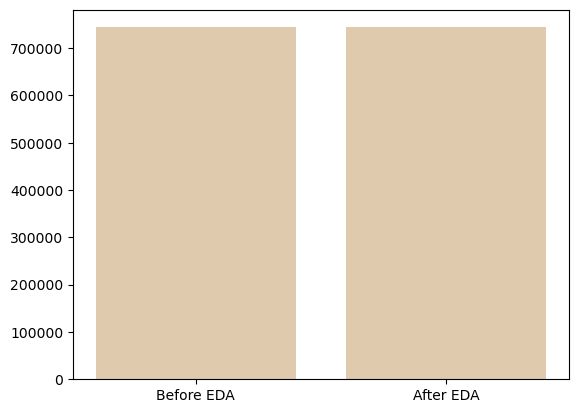

In [21]:
plt.bar(['Before EDA', 'After EDA'], [df_before[0], df_after[0]], color='tan', alpha=0.7, label='Difference in rows')
plt.show

#### From the above visualization we can see that the difference is barely visible and both the graphs look quite similar hence supporting that the integrity of the data is not heavily compromised by dropping rows of data.

In [45]:
datapoints_each_country=df.groupby('country_name').size()


#### Plot a line graph to show the data points of each country available in the data set

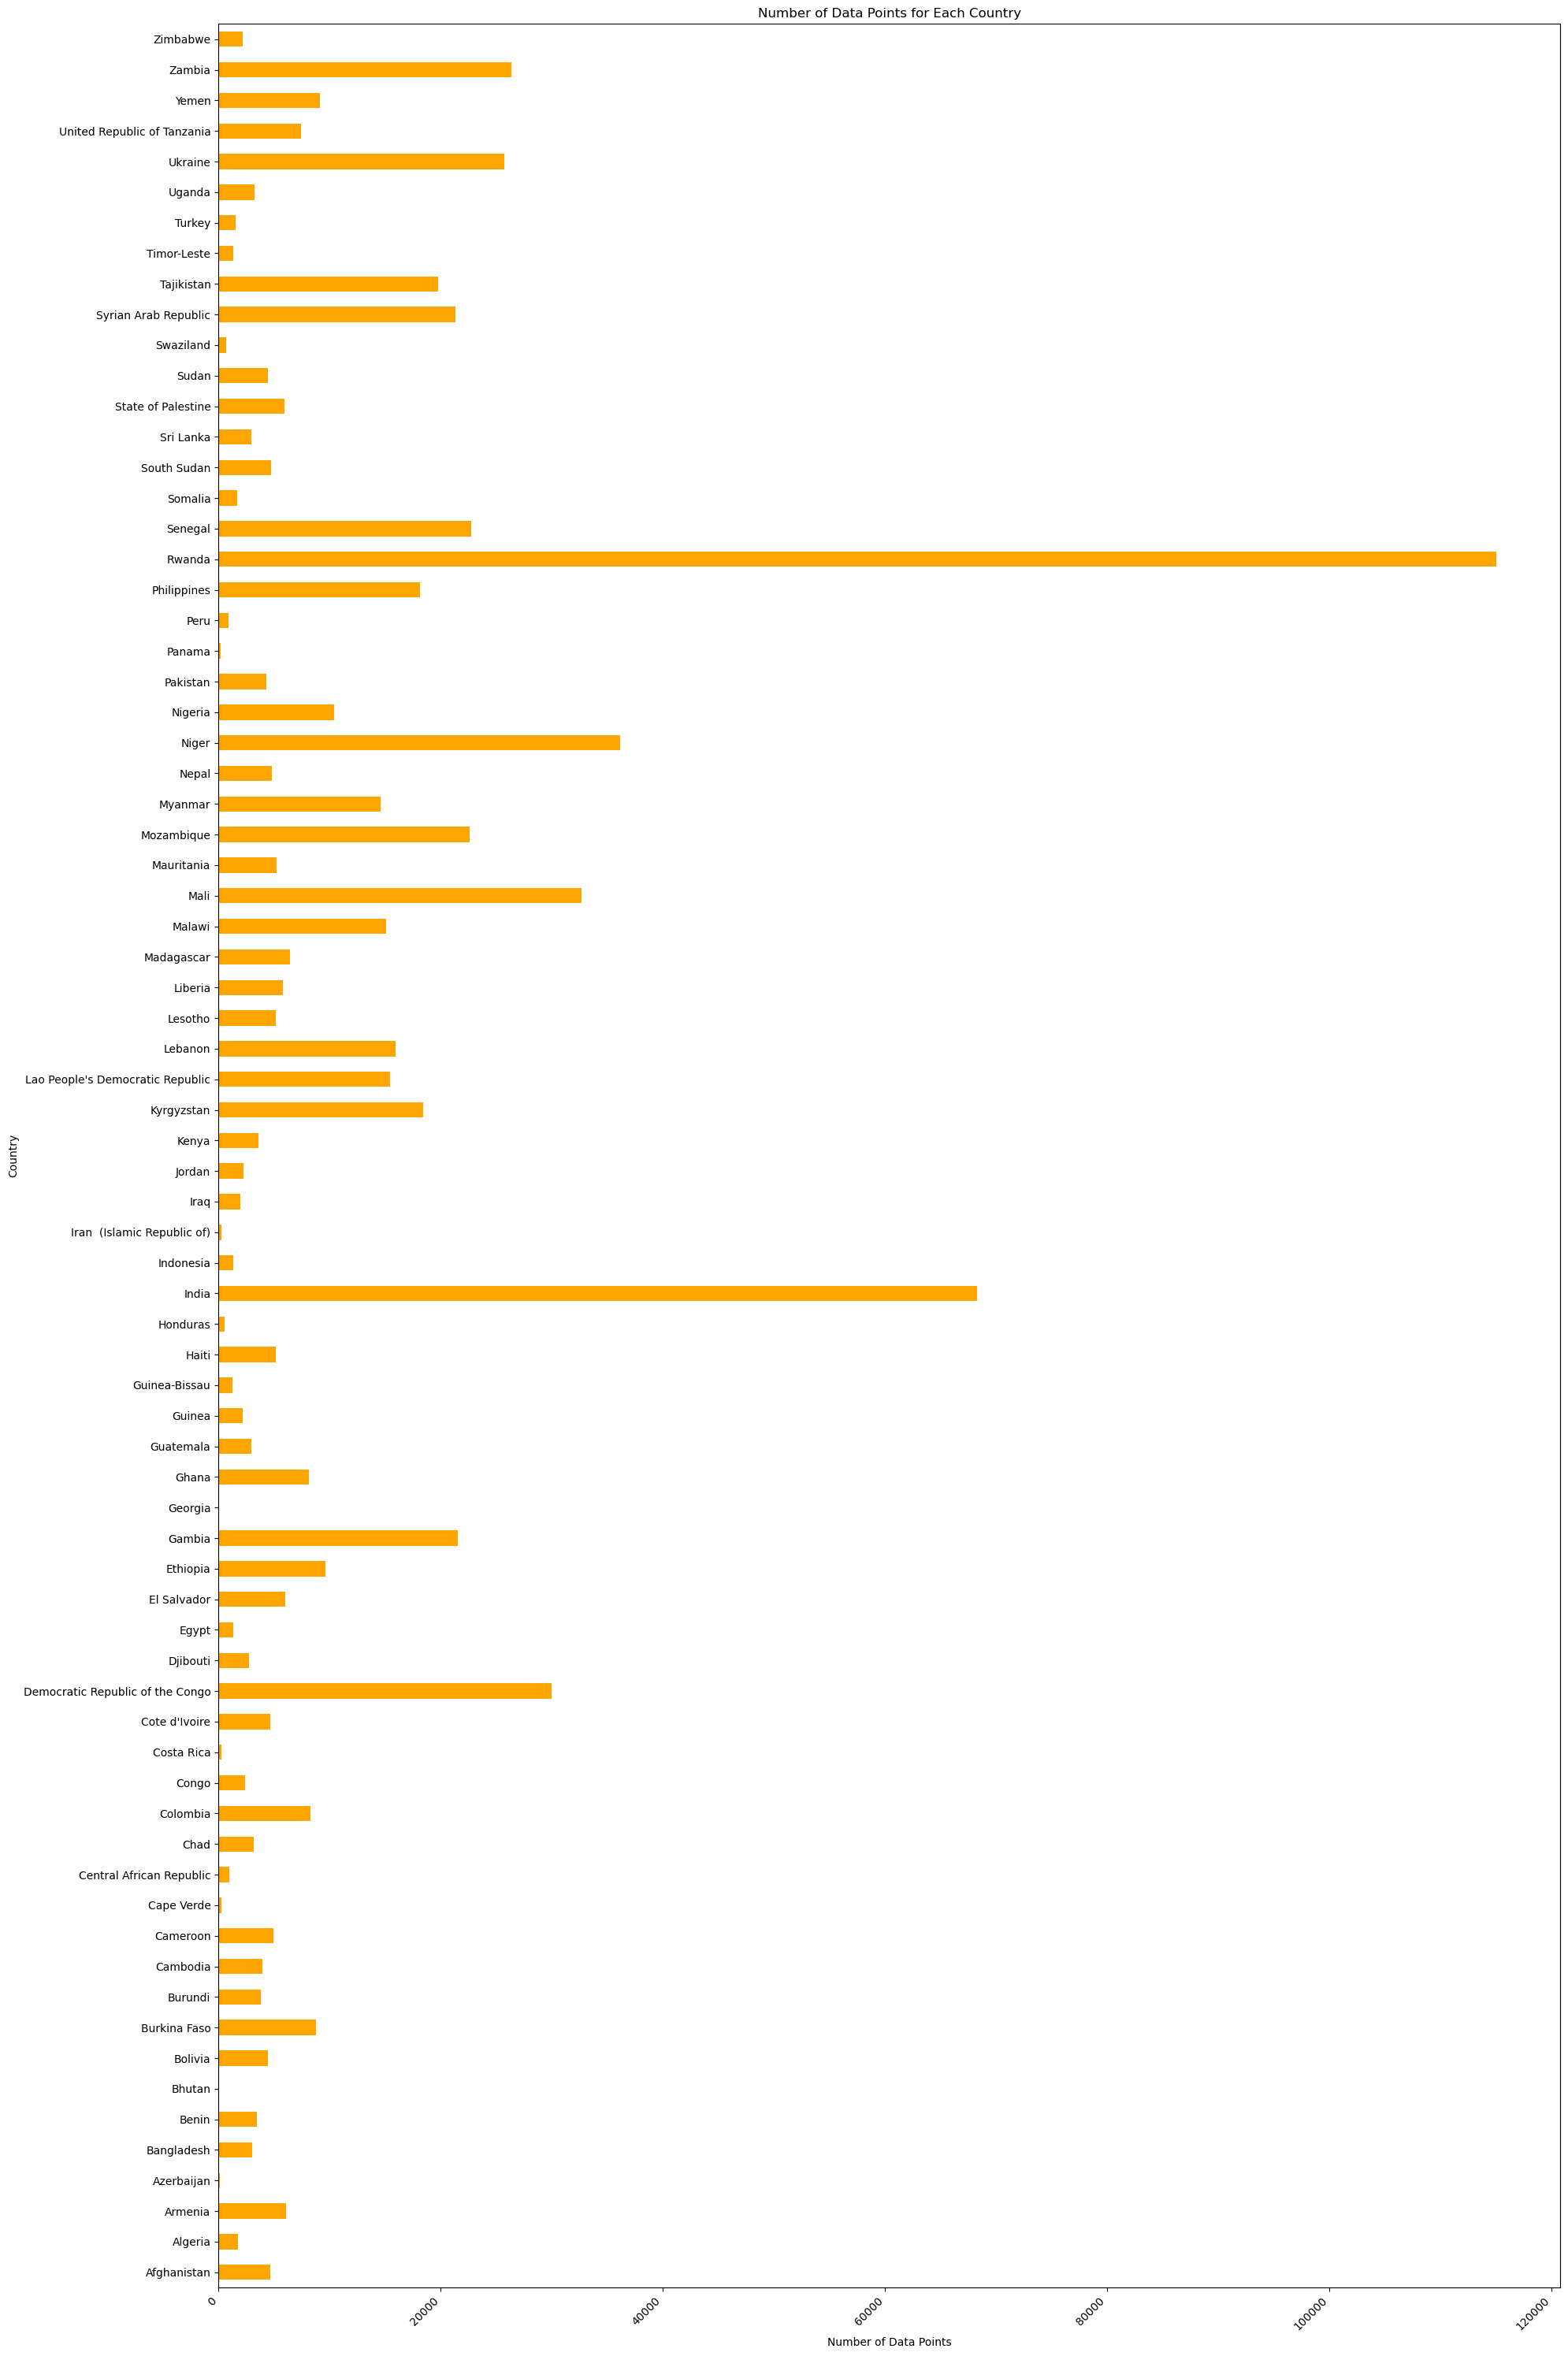

In [46]:
plt.figure(figsize=(20, 30))
datapoints_each_country.plot(kind='barh', color='orange')
plt.xlabel('Number of Data Points')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Country')
plt.title('Number of Data Points for Each Country')
plt.tight_layout()
plt.show()

#### From the above chart we can clearly see that Rwanda has the most data points and there is a vast difference in the amount of data that is collected from each country.There could be a number of reason for this some of which may or may not be size of the country, commodity produced in the country etc. 

In [47]:
# to save this cleaned data into a new csv to perform futher visualizations 
df.to_csv('Global_food_prices.csv',index=False)